Loading and preparing data...
Data preparation complete.

Training models...
Models trained.

--- Logistic Regression Performance ---
              precision    recall  f1-score   support

   malignant       0.97      0.98      0.98        63
      benign       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

ROC-AUC Score: 0.9979

--- Support Vector Machine (SVM) Performance ---
              precision    recall  f1-score   support

   malignant       0.97      0.97      0.97        63
      benign       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

ROC-AUC Score: 0.9965

Generating ROC curve visualization...


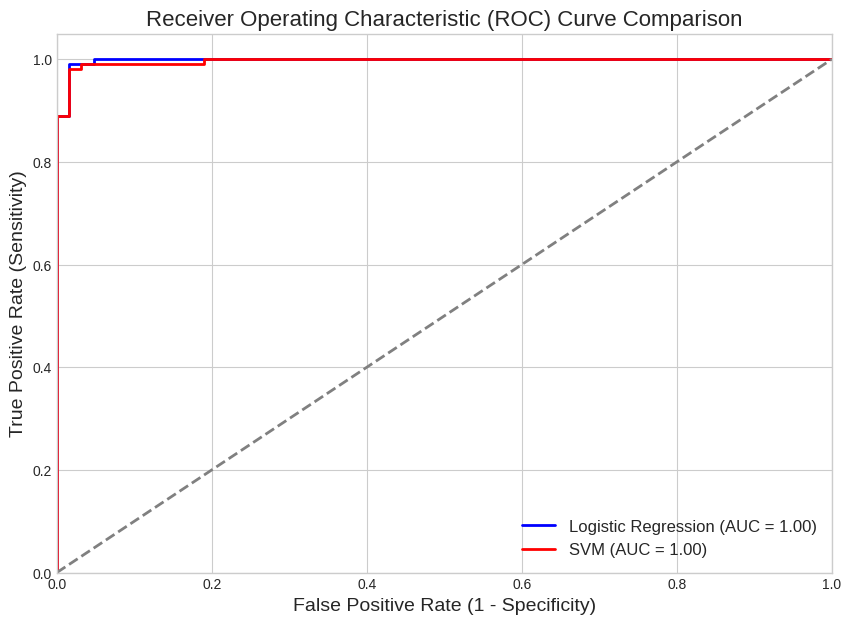

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    classification_report
)

def main():
    """
    Main function to compare Logistic Regression and SVM classifiers.
    """
    # --- 1. Load and Prepare the Data ---
    print("Loading and preparing data...")
    data = load_breast_cancer()
    X, y = data.data, data.target

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    # Scale the features. This is crucial for both models, especially SVM.
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    print("Data preparation complete.")

    # --- 2. Initialize and Train Models ---
    print("\nTraining models...")
    # Initialize Logistic Regression
    log_reg = LogisticRegression(random_state=42)

    # Initialize Support Vector Machine (SVM)
    # probability=True is needed to get probability estimates for ROC-AUC
    svm_clf = SVC(kernel='linear', probability=True, random_state=42)

    # Train both models
    log_reg.fit(X_train, y_train)
    svm_clf.fit(X_train, y_train)
    print("Models trained.")

    # --- 3. Make Predictions ---
    # Get class predictions
    y_pred_lr = log_reg.predict(X_test)
    y_pred_svm = svm_clf.predict(X_test)

    # Get probability predictions for the positive class (for ROC curve)
    y_prob_lr = log_reg.predict_proba(X_test)[:, 1]
    y_prob_svm = svm_clf.predict_proba(X_test)[:, 1]

    # --- 4. Evaluate Models ---
    print("\n--- Logistic Regression Performance ---")
    print(classification_report(y_test, y_pred_lr, target_names=data.target_names))
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob_lr):.4f}")

    print("\n--- Support Vector Machine (SVM) Performance ---")
    print(classification_report(y_test, y_pred_svm, target_names=data.target_names))
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob_svm):.4f}")

    # --- 5. Visualize ROC Curves ---
    print("\nGenerating ROC curve visualization...")
    # Calculate ROC curve data
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)

    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(10, 7))

    # Plot Logistic Regression ROC
    plt.plot(fpr_lr, tpr_lr, color='blue', lw=2,
             label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_lr):.2f})')

    # Plot SVM ROC
    plt.plot(fpr_svm, tpr_svm, color='red', lw=2,
             label=f'SVM (AUC = {roc_auc_score(y_test, y_prob_svm):.2f})')

    # Plot the random guess line
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=14)
    plt.ylabel('True Positive Rate (Sensitivity)', fontsize=14)
    plt.title('Receiver Operating Characteristic (ROC) Curve Comparison', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.show()


if __name__ == '__main__':
    main()
